# Austin Crime Reports Analysis

In [1]:
from pandas import Series,DataFrame
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [2]:
df = pd.read_csv('Crime_cleaned.csv')

In [3]:
df.drop(['Unnamed: 0','Occurred Date','Occurred Time','Report Date','Report Time','Location'],inplace=True, axis=1)

In [4]:
# convert dates to pandas datetime format
df['Occurred Date Time'] = pd.to_datetime(df['Occurred Date Time'])
# setting the index to be the date will help us a lot later on
df.index = pd.DatetimeIndex(df['Occurred Date Time'])

In [5]:
#Breaking down hour, month, year for grouping later
df['time_hour'] = df['Occurred Date Time'].apply(lambda x: x.hour)
df['month'] = df['Occurred Date Time'].apply(lambda x: x.month)
df['year'] = df['Occurred Date Time'].apply(lambda x: x.year)

In [6]:
#Remove 2019 entries
df = df[df['year'] != 2019]

In [7]:
df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Report Date Time,Location Type,Address,Zip Code,Council District,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,Latitude,Longitude,time_hour,month,year
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,
2018-12-31 23:58:00,20198000263,BURGLARY OF VEHICLE,601,N,2018-12-31 23:58:00,01/09/2019 09:50:00 PM,STREETS / HWY / ROAD / ALLEY,E 5TH ST / ONION ST,78702.0,3.0,...,9.02,N,01/29/2019,23F,Theft,30.262470,-97.727980,23,12,2018
2018-12-31 23:54:00,20183652244,DEADLY CONDUCT,408,N,2018-12-31 23:54:00,12/31/2018 11:54:00 PM,RESIDENCE / HOME,7605 EASTCREST DR,78752.0,4.0,...,18.04,NaN,NaN,13A,Aggravated Assault,30.339849,-97.706618,23,12,2018
2018-12-31 23:50:00,20198000041,BURGLARY OF VEHICLE,601,N,2018-12-31 23:50:00,01/01/2019 12:16:00 PM,STREETS / HWY / ROAD / ALLEY,1509 E 3RD ST,78702.0,3.0,...,9.02,N,01/09/2019,23F,Theft,30.260316,-97.728247,23,12,2018
2018-12-31 23:30:00,20195000032,THEFT,600,N,2018-12-31 23:30:00,01/01/2019 11:14:00 AM,BAR / NIGHT CLUB,306 E 6TH ST,78701.0,9.0,...,11.00,N,01/02/2019,23H,Theft,30.267583,-97.739930,23,12,2018
2018-12-31 23:00:00,20195000043,BURGLARY OF VEHICLE,601,N,2018-12-31 23:00:00,01/01/2019 12:25:00 PM,PARKING LOTS / GARAGE,11900 HOBBY HORSE CT,78758.0,7.0,...,18.49,N,01/02/2019,23F,Theft,30.404854,-97.713715,23,12,2018


In [8]:
df.shape

(373783, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373783 entries, 2018-12-31 23:58:00 to 2010-01-01 00:01:00
Data columns (total 21 columns):
Incident Number                373783 non-null int64
Highest Offense Description    373783 non-null object
Highest Offense Code           373783 non-null int64
Family Violence                373783 non-null object
Occurred Date Time             373783 non-null datetime64[ns]
Report Date Time               373783 non-null object
Location Type                  373273 non-null object
Address                        373783 non-null object
Zip Code                       372719 non-null float64
Council District               372089 non-null float64
APD Sector                     373158 non-null object
Census Tract                   372720 non-null float64
Clearance Status               358219 non-null object
Clearance Date                 358217 non-null object
UCR Category                   373783 non-null object
Category Description           37378

# Exploratory Data Analysis

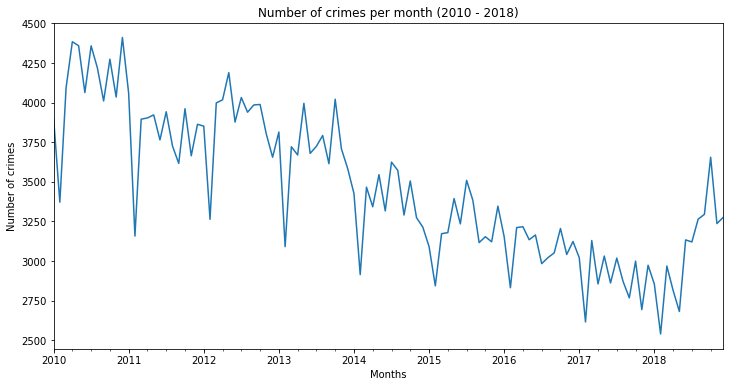

In [10]:
#Crime Reports by month

plt.figure(figsize=(12,6))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2010 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

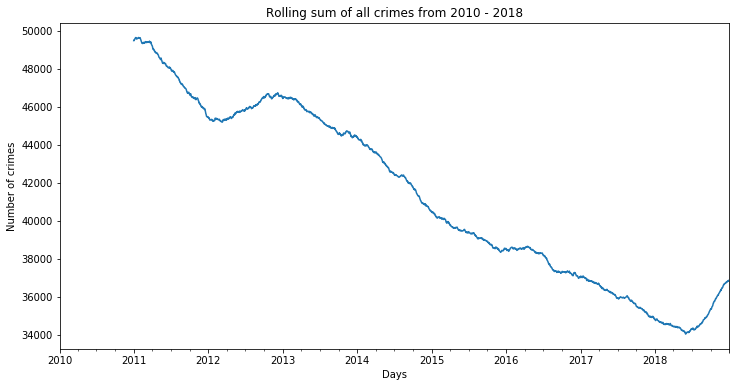

In [11]:
#Rolling sum of all crimes from 2010 through 2018

plt.figure(figsize=(12,6))
df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2010 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
# plt.ylim(bottom = 0)
plt.show()

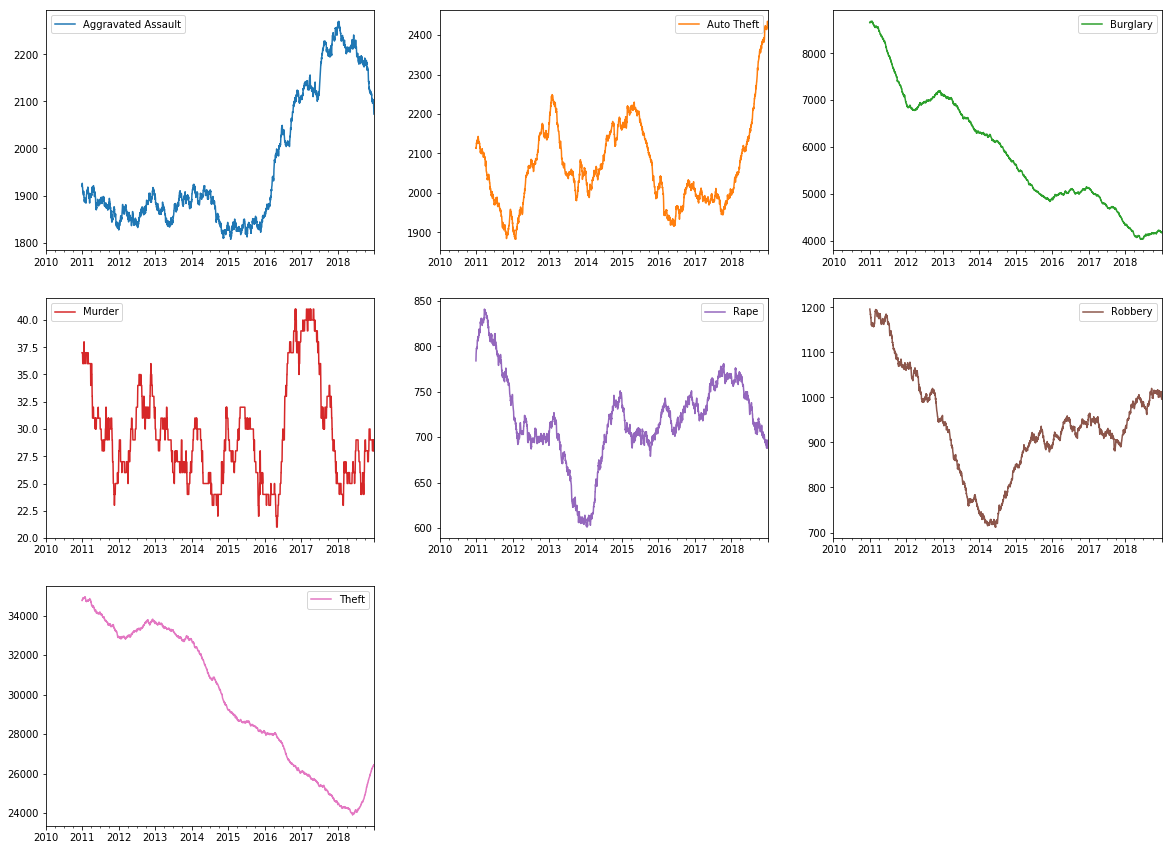

In [12]:
#Crime occurence by type

crimes_count_date = df.pivot_table('Incident Number', aggfunc=np.size, columns='Category Description', 
                                   index=df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(20, 15), subplots = True,
                                                 layout=(-1, 3), sharex=False, sharey=False)

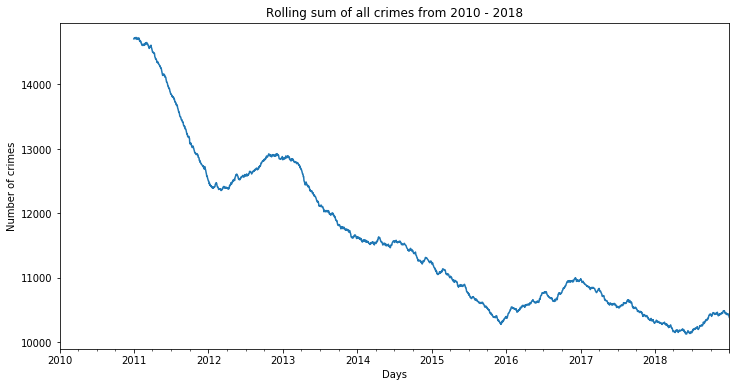

In [13]:
#Rolling sum of crime rate without theft
df_no_theft = df[df['Category Description'] != 'Theft']
# df_no_theft.reset_index(inplace=True)

plt.figure(figsize=(12,6))
df_no_theft.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2010 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
# plt.ylim(bottom = 0)
plt.show()

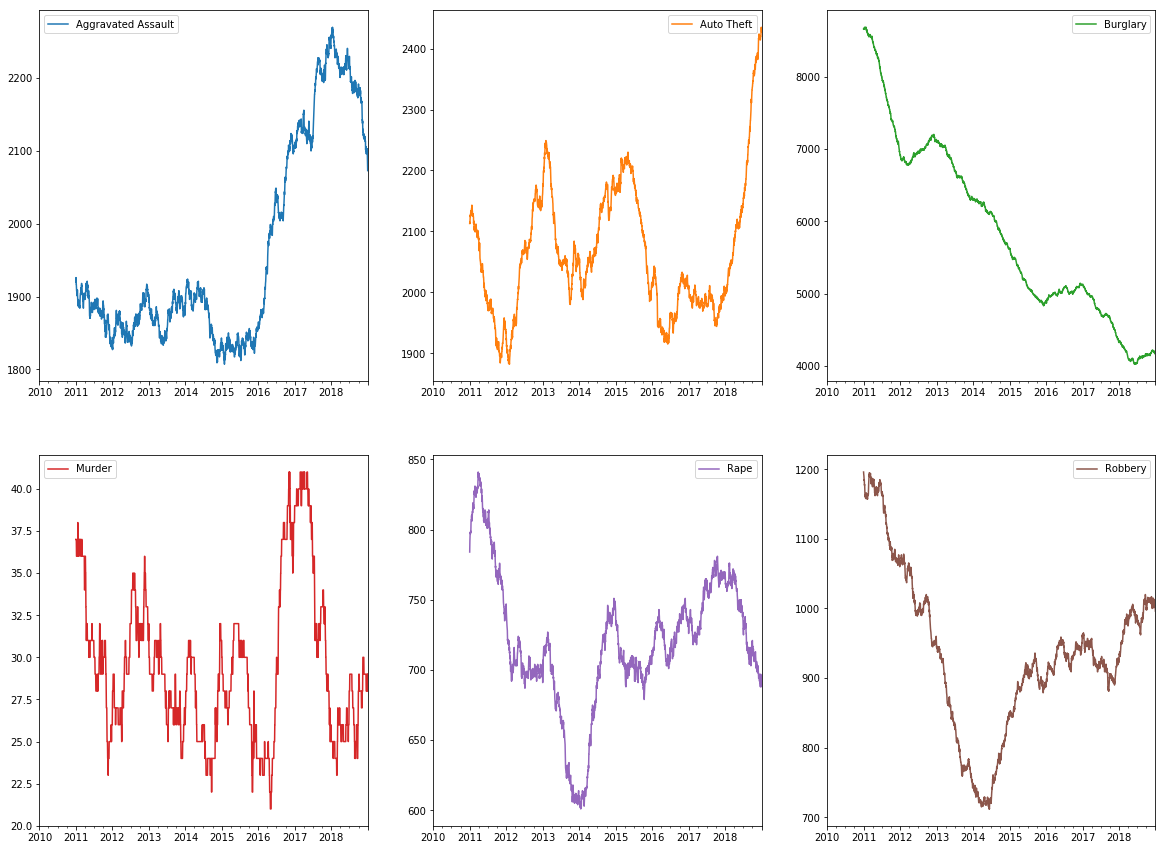

In [14]:
#Crime occurence by type excluding theft

crimes_count_date = df_no_theft.pivot_table('Incident Number', aggfunc=np.size, columns='Category Description', 
                                   index=df_no_theft.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(20, 15), subplots=True, 
                                                 layout=(-1, 3), sharex=False, sharey=False)

In [15]:
# df_2016 = df[df['year'] == 2016]
# df_2017 = df[df['year'] == 2017]
# df_2018 = df[df['year'] == 2018]

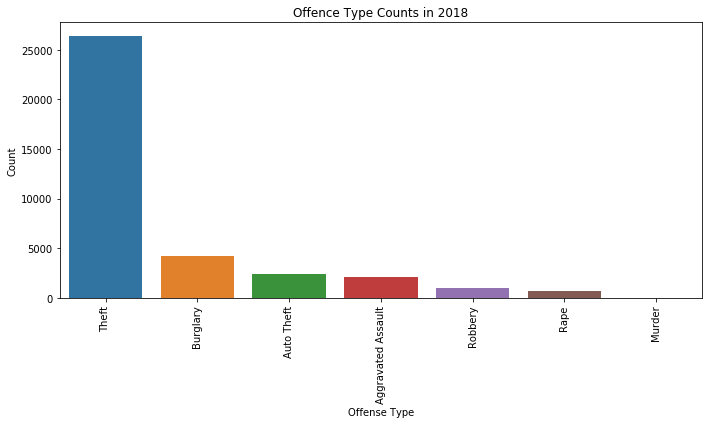

In [31]:
#Barplot of Offence Type counts in 2018
df_2018 = df[df['year'] == 2018]

df_1 = df_2018.groupby('Category Description').count().sort_values(by='Incident Number',ascending=False)
df_1.reset_index(inplace=True)

plt.figure(figsize=(10,6))
crime_type_plot = sns.barplot(x='Category Description',y='Incident Number', data=df_1)

crime_type_plot.set_xticklabels(crime_type_plot.get_xticklabels(), rotation=90)
crime_type_plot.set(title= 'Offence Type Counts in 2018', xlabel='Offense Type', ylabel='Count')
plt.tight_layout()
plt.show()

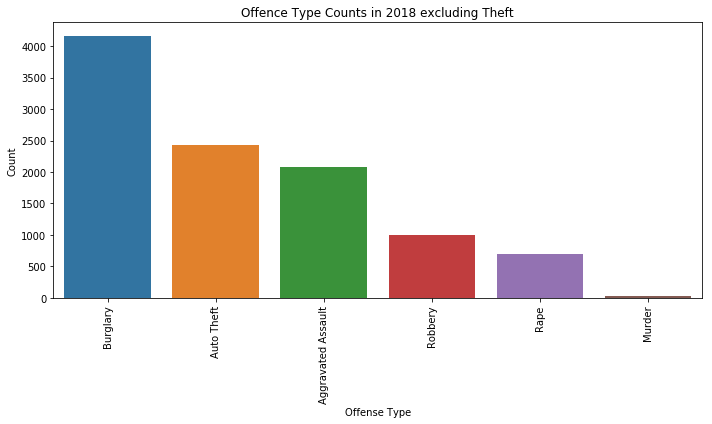

In [17]:
#Barplot of Offense Type counts in 2018 WITHOUT Theft
df_new = df_1[df_1['Category Description'] != 'Theft']
df_new.reset_index(inplace=True)

plt.figure(figsize=(10,6))
crime_type_plot_new = sns.barplot(x='Category Description',y='Incident Number', data=df_new)

crime_type_plot_new.set_xticklabels(crime_type_plot_new.get_xticklabels(), rotation=90)
crime_type_plot_new.set(title= 'Offence Type Counts in 2018 excluding Theft', xlabel='Offense Type', ylabel='Count')
plt.tight_layout()
plt.show()

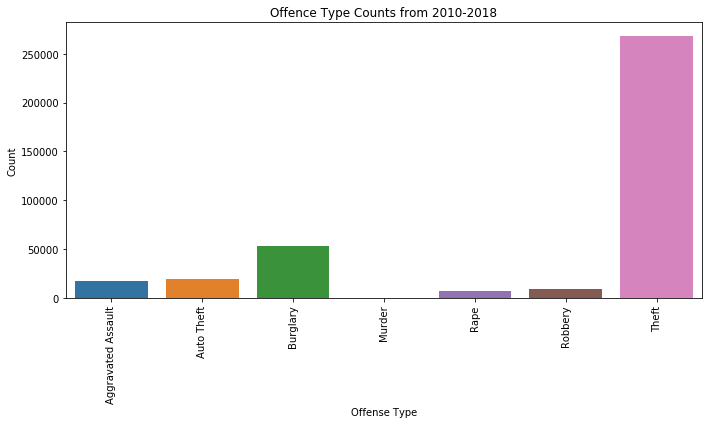

In [18]:
#Barplot of Offence Type counts from 2010-2018

crimes_by_offense = df.groupby('Category Description').count()
crimes_by_offense.reset_index(inplace=True)

plt.figure(figsize=(10,6))
crimes_by_offense_plot = sns.barplot(x='Category Description',y='Incident Number', data=crimes_by_offense)

crimes_by_offense_plot.set_xticklabels(crimes_by_offense_plot.get_xticklabels(), rotation=90)
crimes_by_offense_plot.set(title= 'Offence Type Counts from 2010-2018', xlabel='Offense Type', ylabel='Count')
plt.tight_layout()
plt.show()

#Same pattern as for 2018

In [19]:
#Remove null/'88' values from APD Sector column
df_2018['APD Sector'] = df_2018['APD Sector'].replace('88', np.nan)
df_2018 = df_2018.dropna(axis=0, subset=['APD Sector'])

C:\Users\rawin\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
#Barplot of crime occurences by APD sector in 2018
df_2 = df_2018.groupby('APD Sector').count().sort_values(by='Incident Number',ascending=False)
df_2.reset_index(inplace=True)

In [21]:
df_2['APD Sector'] = df_2['APD Sector'].replace(['AD','AP','BA','CH','DA','ED','FR','GE','HE','ID'],
                          ['ADAM','APT','BAKER','CHARLIE','DAVID','EDWARD','FRANK','GEORGE','HENRY','IDA'])

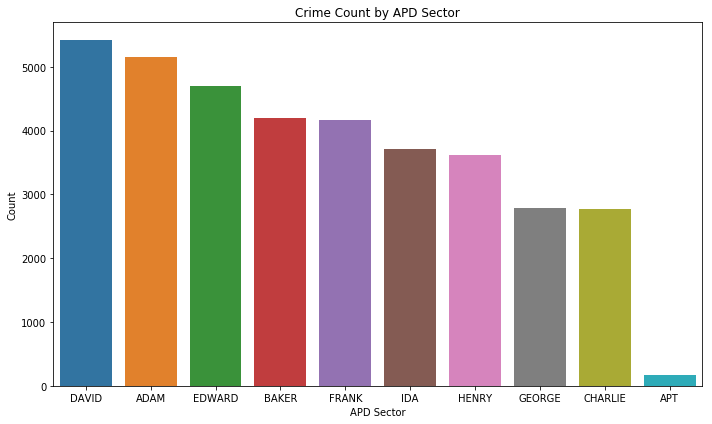

In [22]:
plt.figure(figsize=(10,6))
APD_sector_plot = sns.barplot(x='APD Sector', y='Incident Number', data=df_2)

APD_sector_plot.set(xlabel='APD Sector', ylabel='Count',title='Crime Count by APD Sector')
plt.tight_layout()
plt.show()

**Crime rate by day of the week**

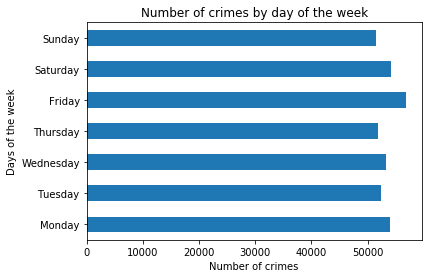

In [23]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

**Crime rate by month**

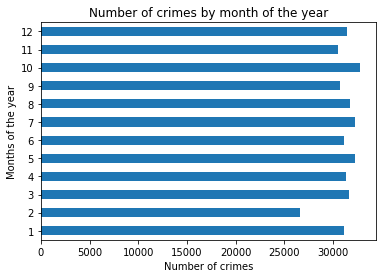

In [24]:
df.groupby([df.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

No pattern of crime count by month.

**Crime rate by location.**

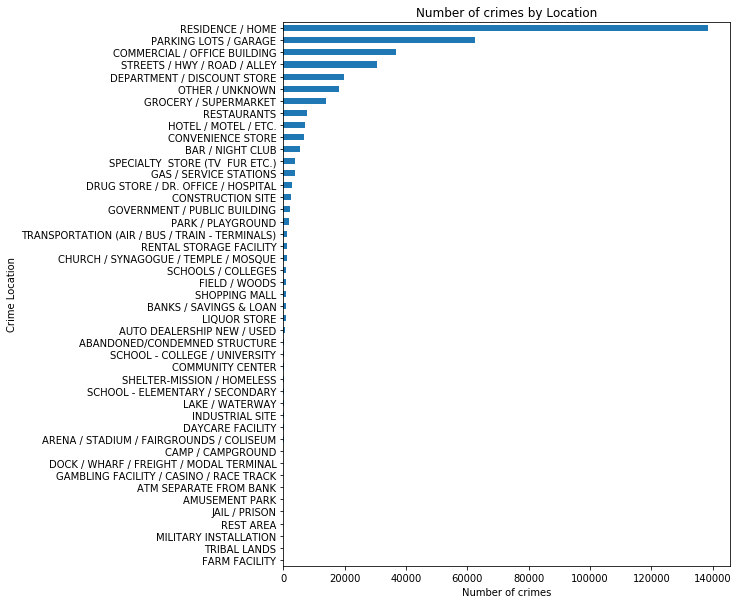

In [25]:
plt.figure(figsize=(8,10))
df.groupby([df['Location Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

**Heatmap of type of crime and location it is most likely to occur**

In [26]:
location_by_type  = df.pivot_table(values='Incident Number', index='Location Type', 
                                       columns='Category Description', aggfunc=np.size).fillna(0)

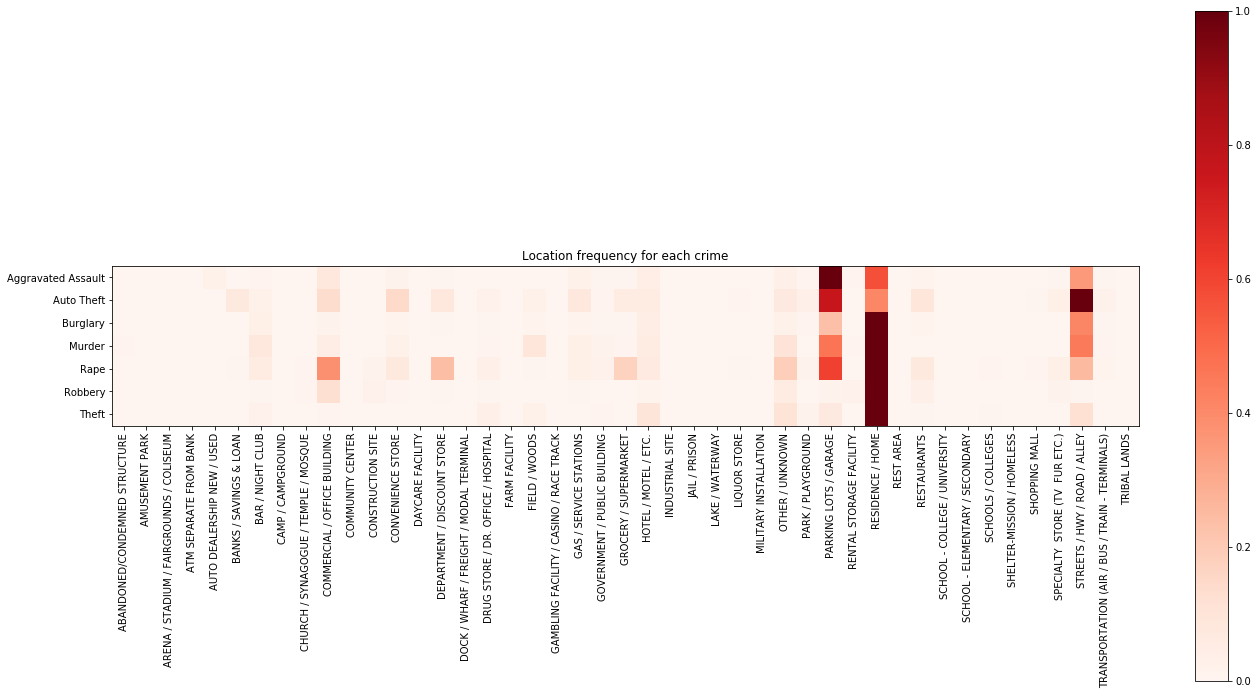

In [27]:
from sklearn.cluster import AgglomerativeClustering as AC

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_1 = normalize(location_by_type)
ix = AC(3).fit(df_1.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(20,16))
plt.imshow(df_1.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df_1.shape[0]), df_1.index, rotation='vertical')
plt.yticks(np.arange(df_1.shape[1]), df_1.columns)
plt.title('Location frequency for each crime')
plt.grid(False)
plt.show()

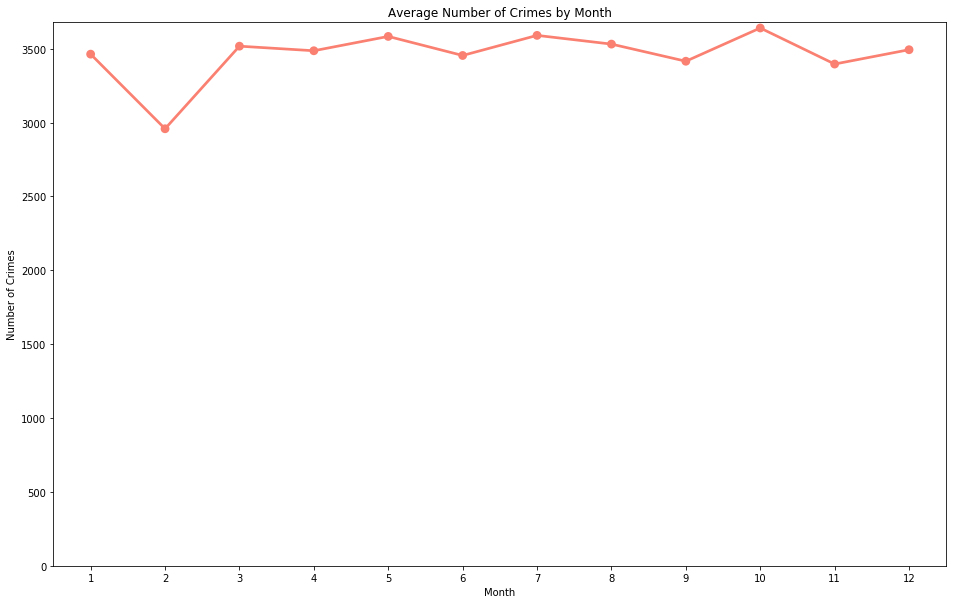

In [28]:
crimes_by_month = df.groupby('month').size().reset_index(name = 'Number of Crimes')

#Divide each monthly total by 9 years to get the avg crime count
crimes_by_month['month (average)'] = crimes_by_month['Number of Crimes'].apply(lambda x:x/9)

#plot
fig = plt.figure(figsize = (16, 10))
sns.pointplot(data=crimes_by_month, x='month',y='month (average)', color = 'salmon')

plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Average Number of Crimes by Month')
plt.ylim(bottom = 0)
plt.show()